<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

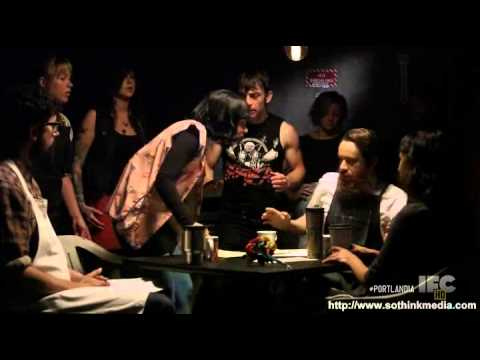

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

In [19]:
import spacy
from spacy.tokenizer import Tokenizer
from collections import Counter

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
# first i will explore the data

In [4]:
shops.shape

(7616, 3)

In [5]:
shops.iloc[1].full_review_text

' 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. '

In [6]:
shops.iloc[3].full_review_text

' 11/25/2016 Very cool decor! Good drinks Nice seating  However...  Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd.  Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average.  It feels like a Los Angeles coffee shot that is out of place. '

In [7]:
shops["star_rating"].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [8]:

shops["coffee_shop_name"].unique()

array(['The Factory - Cafe With a Soul ',
       'The Marvelous Vintage Tea Party Co. ', 'Vintage Heart Coffee ',
       'Fleet Coffee ', 'Mozart’s Coffee Roasters ',
       'Summermoon Coffee Bar ', 'Monkey Nest Coffee ',
       'Apanas Coffee & Beer ', 'Corona Coffee ', 'Café Crème ',
       'Brian’s Brew ', 'Legend Coffee ', 'Venezia Italian Gelato ',
       'Epoch Coffee ', 'Houndstooth Coffee ', 'Caffé Medici ',
       'Flitch Coffee ', 'Caffe Medici ', 'Holy Grounds ',
       'Figure 8 Coffee Purveyors ', 'Mañana Coffee & Juice ',
       'Summer Moon Coffee Bar ', 'Fat Cats Organic Coffee And Dessert ',
       'Flat Track Coffee ', 'Mary’s Cafe ', 'Anderson’s Coffee Company ',
       'Flightpath Coffeehouse ', 'Third Coast Coffee Roasting Company ',
       'Bennu Coffee ', 'Dolce Neve ', 'Thunderbird Coffee ', 'Halcyon ',
       'Cherrywood Coffeehouse ', 'Jo’s Coffee ',
       'Arturo’s Underground Cafe ', 'Patika ', 'Cenote ',
       'The Hideout Coffeehouse ', 'Lucky Lab Coffe

In [9]:
# Make copy of data

shopsc = shops

In [10]:
# Lets Clean the data

In [44]:
# remove extra words in star_rating

shopsc["star_rating"] = shopsc["star_rating"].str.replace(' star rating', '')

In [45]:
# cast ratings as floats

shops['star_rating'] = shops['star_rating'].astype(float)

In [11]:
# seperate the date from the review

shopsc['date'] = shopsc['full_review_text'].str.split(" ")[0][1]

In [34]:
# Check if date removal worked

shopsc.head(5)

,coffee_shop_name,full_review_text,star_rating,date,tokens,lemmas
0,The Factory - Cafe With a Soul,checkin Love love loved the atmosphere Ever...,5.0,11/25/2016,"[ , checkin, love, love, loved, atmosphere, ...","[ , checkin, love, love, love, atmosphere, sh..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Aust...,4.0,11/25/2016,"[listed, night, beautiful, love, definitely, p...","[list, night, beautiful, love, definitely, pre..."
2,The Factory - Cafe With a Soul,checkin Listed in Brunch Spots I loved the ...,4.0,11/25/2016,"[ , checkin, listed, loved, decor, doesnt, w...","[ , checkin, list, love, decor, do, not, want..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Ho...,2.0,11/25/2016,"[cool, decor, good, drinks, nice, seating, alm...","[cool, decor, good, drink, nice, seating, almo..."
4,The Factory - Cafe With a Soul,checkin They are located within the Northcr...,4.0,11/25/2016,"[ , checkin, plenty, parking, loved, friendl...","[ , checkin, plenty, parking, love, friendly,..."


In [13]:
#Remove dates along with other numbers and such nonsense
import re

shopsc['full_review_text'] = shopsc['full_review_text'].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x))

In [38]:
shopsc.head(5)

,coffee_shop_name,full_review_text,star_rating,date,tokens,lemmas
0,The Factory - Cafe With a Soul,checkin Love love loved the atmosphere Ever...,5.0,11/25/2016,"[ , checkin, love, love, loved, atmosphere, ...","[ , checkin, love, love, love, atmosphere, sh..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Aust...,4.0,11/25/2016,"[listed, night, beautiful, love, definitely, p...","[list, night, beautiful, love, definitely, pre..."
2,The Factory - Cafe With a Soul,checkin Listed in Brunch Spots I loved the ...,4.0,11/25/2016,"[ , checkin, listed, loved, decor, doesnt, w...","[ , checkin, list, love, decor, do, not, want..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Ho...,2.0,11/25/2016,"[cool, decor, good, drinks, nice, seating, alm...","[cool, decor, good, drink, nice, seating, almo..."
4,The Factory - Cafe With a Soul,checkin They are located within the Northcr...,4.0,11/25/2016,"[ , checkin, plenty, parking, loved, friendl...","[ , checkin, plenty, parking, love, friendly,..."


In [ ]:
# Get tokens

In [16]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [17]:
# extend spacy stopwords
STOP_WORDS = nlp.Defaults.stop_words.union([' ', '  ', 'check-in', "i'm", "it's", "i've", 'place', 'coffee', 'coffee.', 'austin', '-'
])

In [18]:
# Get tokens, but exclude stopwords.
tokens = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        token = token.text.lower()
        if token not in STOP_WORDS:
            doc_tokens.append(token)
    tokens.append(doc_tokens)

# Create column of lists of tokens.
shopsc['tokens'] = tokens

In [41]:
# function that takes a corpus and returns a dataframe
def wcount(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [21]:
# list of words used in < 2.5% of reviews
wc = wcount(shopsc['tokens'])
wc = wc[wc['appears_in_pct'] < 0.025]
uncommon_words = wc['word'].tolist()

In [22]:
# update tokens by excluding stopwords & uncommon words
tokens = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        token = token.text.lower()
        if token not in STOP_WORDS and token not in uncommon_words:
            doc_tokens.append(token)
    tokens.append(doc_tokens)

# create column of lists of tokens
shopsc['tokens'] = tokens

In [26]:
# Lemmatization def

def get_lemmas(tokens):
    lemmas = []
    doc = nlp(str(tokens))
    for token in doc:
        if ((token.is_punct == False) and (token.pos_!= 'PRON')):
            lemmas.append(token.lemma_)
    return lemmas

shopsc['lemmas'] = shopsc['tokens'].apply(get_lemmas)

In [27]:
shopsc[['tokens', 'lemmas']].head()

,tokens,lemmas
0,"[ , checkin, love, love, loved, atmosphere, ...","[ , checkin, love, love, love, atmosphere, sh..."
1,"[listed, night, beautiful, love, definitely, p...","[list, night, beautiful, love, definitely, pre..."
2,"[ , checkin, listed, loved, decor, doesnt, w...","[ , checkin, list, love, decor, do, not, want..."
3,"[cool, decor, good, drinks, nice, seating, alm...","[cool, decor, good, drink, nice, seating, almo..."
4,"[ , checkin, plenty, parking, loved, friendl...","[ , checkin, plenty, parking, love, friendly,..."


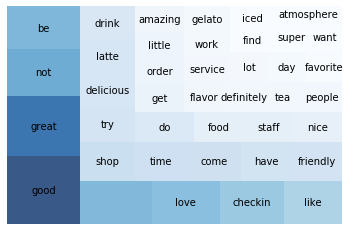

In [46]:
import squarify
import matplotlib
import matplotlib.pyplot as plt

# Good reviews have five stars.
good_reviews = shopsc[shopsc.star_rating == 5]
good_words = wcount(good_reviews['lemmas'])
top_good = good_words[good_words['rank'] <= 40]
pct_totals = top_good['pct_total']

# Create a color palette.
cmap = matplotlib.cm.Blues
mini=min(pct_totals)
maxi=max(pct_totals)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in pct_totals]

# Show plot of top 40 words common to good reviews.
squarify.plot(
    sizes=pct_totals,
    label=top_good['word'],
    alpha=.8,
    color=colors
)
plt.axis('off')
plt.show()

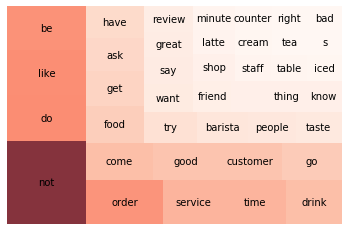

In [48]:
# Bad reviews have one star.
bad_reviews = shopsc[shopsc.star_rating == 1]
bad_words = wcount(bad_reviews['lemmas'])
top_bad = bad_words[bad_words['rank'] <= 40]
pct_totals = top_bad['pct_total']

cmap = matplotlib.cm.Reds
mini=min(pct_totals)
maxi=max(pct_totals)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in pct_totals]

squarify.plot(
    sizes=pct_totals,
    label=top_bad['word'],
    alpha=.8,
    color=colors
)
plt.axis('off')
plt.show()

## Stretch Goals

* Coffee shops that get good reviews are described as 'delicious', 'great', and 'amazing'. shops that recieve negative reviews are often described as 'bad'. The word 'not' is used with a greater proportional frequency in bad reviews than good reviews.

